In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
terms = pd.read_csv('congress-terms.csv')
resignation = pd.read_csv('congressional_resignations.csv')
genericBallot = pd.read_csv('generic_topline_historical.csv')

In [5]:
terms.tail()

,congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age
18630,113,senate,B000243,Max,S.,Baucus,NaN,1937-12-10,MT,D,Yes,2013-01-03,75.1
18631,113,senate,C001099,William,NaN,Cowan,NaN,1965-04-03,MA,D,No,2013-01-03,47.8
18632,113,senate,C001100,Jeffrey,Scott,Chiesa,NaN,1961-06-21,NJ,R,No,2013-01-03,51.5
18633,113,senate,K000148,John,Forbes,Kerry,NaN,1939-12-10,MA,D,Yes,2013-01-03,73.1
18634,113,senate,L000123,Frank,R.,Lautenberg,NaN,1920-01-22,NJ,D,Yes,2013-01-03,93.0


In [4]:
terms.party.unique()

array(['D', 'R', 'AL', 'L', 'I', 'ID'], dtype=object)

In [6]:
terms.isna().sum()

congress          0
chamber           0
bioguide          0
firstname         0
middlename     3536
lastname          0
suffix        16937
birthday          0
state             0
party             0
incumbent         0
termstart         0
age               0
dtype: int64

In [10]:
terms.drop(['middlename','suffix'],axis=1,inplace=True)

In [11]:
terms.isna().sum()

congress     0
chamber      0
bioguide     0
firstname    0
lastname     0
birthday     0
state        0
party        0
incumbent    0
termstart    0
age          0
dtype: int64

In [12]:
terms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18635 entries, 0 to 18634
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   congress   18635 non-null  int64  
 1   chamber    18635 non-null  object 
 2   bioguide   18635 non-null  object 
 3   firstname  18635 non-null  object 
 4   lastname   18635 non-null  object 
 5   birthday   18635 non-null  object 
 6   state      18635 non-null  object 
 7   party      18635 non-null  object 
 8   incumbent  18635 non-null  object 
 9   termstart  18635 non-null  object 
 10  age        18635 non-null  float64
dtypes: float64(1), int64(1), object(9)
memory usage: 1.6+ MB


In [22]:
terms.party.unique()

array(['D', 'R', 'AL', 'L', 'I', 'ID'], dtype=object)

In [28]:
termsTest = terms[terms['party'].str.contains('AL|L|I|ID')==False]

In [29]:
termsTest

,congress,chamber,bioguide,firstname,lastname,birthday,state,party,incumbent,termstart,age
0,80,house,M000112,Joseph,Mansfield,1861-02-09,TX,D,Yes,1947-01-03,85.9
1,80,house,D000448,Robert,Doughton,1863-11-07,NC,D,Yes,1947-01-03,83.2
2,80,house,S000001,Adolph,Sabath,1866-04-04,IL,D,Yes,1947-01-03,80.7
3,80,house,E000023,Charles,Eaton,1868-03-29,NJ,R,Yes,1947-01-03,78.8
4,80,house,L000296,William,Lewis,1868-09-22,KY,R,No,1947-01-03,78.3
...,...,...,...,...,...,...,...,...,...,...,...
18630,113,senate,B000243,Max,Baucus,1937-12-10,MT,D,Yes,2013-01-03,75.1
18631,113,senate,C001099,William,Cowan,1965-04-03,MA,D,No,2013-01-03,47.8
18632,113,senate,C001100,Jeffrey,Chiesa,1961-06-21,NJ,R,No,2013-01-03,51.5
18633,113,senate,K000148,John,Kerry,1939-12-10,MA,D,Yes,2013-01-03,73.1


In [37]:
termsTest['termstart']= pd.to_datetime(termsTest['termstart'], infer_datetime_format=True)  

C:\Users\abdul\AppData\Local\Temp\ipykernel_6688\129964445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  termsTest['termstart']= pd.to_datetime(termsTest['termstart'], infer_datetime_format=True)


In [39]:
termsTest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18564 entries, 0 to 18634
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   congress   18564 non-null  int64         
 1   chamber    18564 non-null  object        
 2   bioguide   18564 non-null  object        
 3   firstname  18564 non-null  object        
 4   lastname   18564 non-null  object        
 5   birthday   18564 non-null  object        
 6   state      18564 non-null  object        
 7   party      18564 non-null  object        
 8   incumbent  18564 non-null  object        
 9   termstart  18564 non-null  datetime64[ns]
 10  age        18564 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 1.7+ MB


In [31]:
termsTest.party.unique()

array(['D', 'R'], dtype=object)

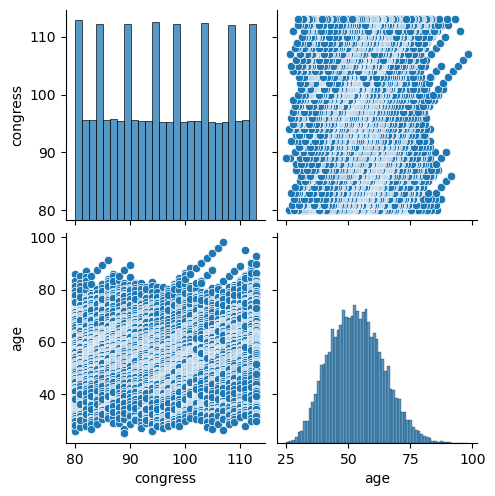

In [40]:
sns.pairplot(termsTest)

In [41]:
termsTest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18564 entries, 0 to 18634
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   congress   18564 non-null  int64         
 1   chamber    18564 non-null  object        
 2   bioguide   18564 non-null  object        
 3   firstname  18564 non-null  object        
 4   lastname   18564 non-null  object        
 5   birthday   18564 non-null  object        
 6   state      18564 non-null  object        
 7   party      18564 non-null  object        
 8   incumbent  18564 non-null  object        
 9   termstart  18564 non-null  datetime64[ns]
 10  age        18564 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 1.7+ MB
